# Estudi Gaussian Mixture

## Lectura fitxer students

In [1]:
import pandas as pd

In [2]:
df_students = pd.read_csv("C:/Users/MLi/Documents/UAB/AC/Projecte/ACproject-07/datasets/Data Carrard.csv")
df_students = df_students.drop('id', axis = 1)

In [3]:
df_categorical = df_students[['sex', 'year', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt']]
df_numerical = df_students[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

In [4]:
def sampleig_dataset(dataset, frac):
    dataset = dataset.sample(frac=frac).reset_index(drop=True)
    return dataset

In [5]:
frac_train = 0.7
frac_test = 0.3

X_train = sampleig_dataset(df_students, frac_train)
X_test = sampleig_dataset(df_students, frac_test)

## Aplicació model

In [6]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Busquem millor model

In [ ]:
from sklearn.model_selection import GridSearchCV

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X)


#### Millor model

In [ ]:
from matplotlib.patches import Ellipse
from scipy import linalg

color_iter = sns.color_palette("tab10", 2)[::-1]
Y_ = grid_search.predict(X)

fig, ax = plt.subplots()

for i, (mean, cov, color) in enumerate(
    zip(
        grid_search.best_estimator_.means_,
        grid_search.best_estimator_.covariances_,
        color_iter,
    )
):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ellipse = Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
    ellipse.set_clip_box(fig.bbox)
    ellipse.set_alpha(0.5)
    ax.add_artist(ellipse)

plt.title(
    f"Selected GMM: {grid_search.best_params_['covariance_type']} model, "
    f"{grid_search.best_params_['n_components']} components"
)
plt.axis("equal")
plt.show()

In [7]:
n_grups = 3
model_gm = GaussianMixture(n_components=n_grups)

In [8]:
def generacio_clusters(model, X, prob=False):
    model.fit(X)

    # prediccio del model sobre tots els pixels de la imatge (omplir variable labels)
    if not prob:
        labels = model.predict(X)
    else: # predicció probabilística de GaussianMixture
        labels = model.predict_proba(X)
    
    # agafar els clusters segons si es k-means o gmm (estan en atributs diferents)
    # if isinstance(model, KMeans):
    #     clusters = model.cluster_centers_
    # else: # GaussianMixture
    clusters = model.means_
        
    return clusters, labels

In [9]:
clusters_gm, labels_gm = generacio_clusters(model_gm, X_train)



Exception in thread Thread-6:
Traceback (most recent call last):
  File "c:\Users\MLi\anaconda3\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\MLi\anaconda3\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\MLi\anaconda3\lib\subprocess.py", line 1479, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\MLi\anaconda3\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\MLi\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\MLi\anaconda

In [11]:
clusters_gm

array([[ 25.37233867,   3.62416964,   1.62527752,  14.53098503,
          0.52486373,   0.55020141,  24.95442754,   3.87505834,
          0.17500345, 106.37089059,  58.90537522,  33.45236357,
         24.1491389 ,   0.70646133,  16.7775831 ,  40.85712392,
         16.12617034,  10.27515681,  25.17353162],
       [ 22.86250012,   2.67500007,   1.67500001,  97.04999783,
          0.51249999,   0.23750001,  26.18749985,   3.725     ,
          0.15      , 104.72500006,  57.49999993,  33.92500005,
         22.58750001,   0.70148809,  20.48750028,  45.52500027,
         17.43750007,  10.11249993,  24.16249997],
       [ 22.01833158,   3.15408306,   1.68997551,   1.        ,
          0.55200994,   0.33199161,  25.0876411 ,   3.76799912,
          0.21399834, 106.77231455,  58.53758301,  35.22574815,
         22.90811281,   0.72305394,  17.57776498,  42.74736314,
         16.91987827,   9.90000074,  24.05815695]])

In [ ]:
sns.scatterplot(x=clusters_gm[:, 0], y=clusters_gm[:, 1], hue=labels_gm,
                    legend=False, alpha=0.5,
                    palette=sns.color_palette('magma', n_colors=len(np.unique(labels_gm))))
plt.title("Clusters")

## Avaluació model

In [12]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

### Elbow Visualizer

In [ ]:
plt.figure(figsize=(20,20))
visualizer = KElbowVisualizer(model_gm, k=n_grups)
visualizer.fit(X_train)   

In [17]:
from scipy.spatial.distance import cdist

def elbow_report(X):
    meandist = []
    n_clusters = range(2,15)
    for n_cluster in n_clusters:
        gmm = GaussianMixture(n_components=n_cluster)
        gmm.fit(X)
        meandist.append(
          sum(
            np.min(
              cdist(X, gmm.means_, 'mahalanobis', VI=gmm.precisions_), 
              axis=1
            ) / X.shape[0]
          )
        )
    plt.plot(n_clusters,meandist,'bx-')
    plt.xlabel('Number of Clusters') 
    plt.ylabel('Mean Mahalanobis Distance') 
    plt.title('GMM Clustering for n_cluster=2 to 15')
    plt.show()

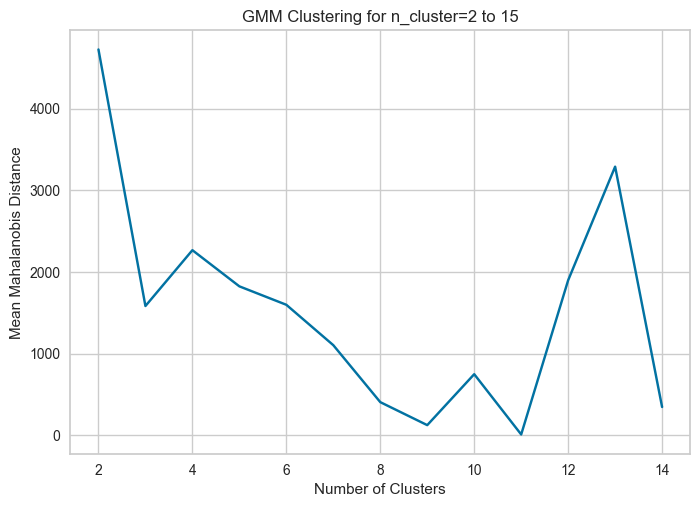

In [18]:
elbow_report(X_train)

### Densitat

In [19]:
from matplotlib.colors import LogNorm

In [22]:
model_gm1 = GaussianMixture(2, covariance_type="full")
model_gm1.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -model_gm1.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

c:\Users\MLi\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but GaussianMixture is expecting 19 features as input.

### Silouhette Visualizer

YellowbrickTypeError: The supplied model is not a clustering estimator; try a classifier or regression score visualizer instead!

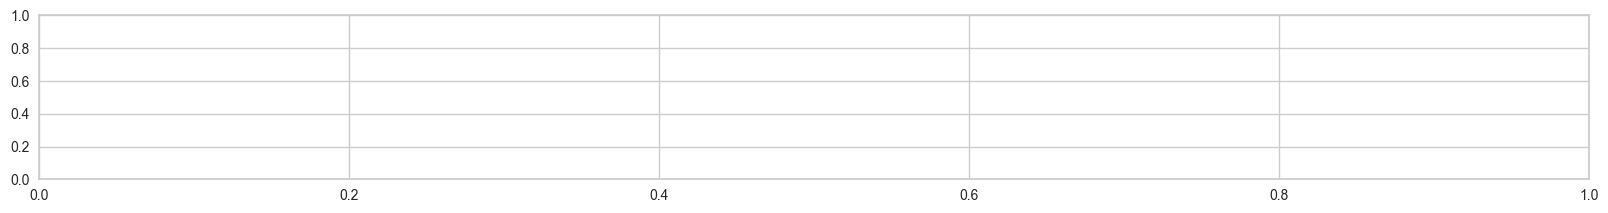

In [16]:
plt.figure(figsize=(20,20))
results = []
i=0
k_tries = range(2, 10)
for k in k_tries:
    i+=1
    plt.subplot(len(k_tries),1, i)
    model = GaussianMixture(k)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    # X, y = get_data('circles')
    visualizer.fit(X)        # Fit the data to the visualizer
    results.append((k, model.inertia_, visualizer.silhouette_score_))
    print(results[-1])
